# LETS GROW MORE-DATA SCIENCE INTERN(LGMFEB)

# TASK-2 STOCK MARKET PREDICTION AND FORECASTING USING STACKED                                                                                                                             LSTM



# NAME -PADIGI REDDY SANGEETHA 


#        

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATASET


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

# DATA OVERVIEW

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df=data.sort_values(by='Date')

In [8]:
df.head()
     


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# DATA VISUALIZATION


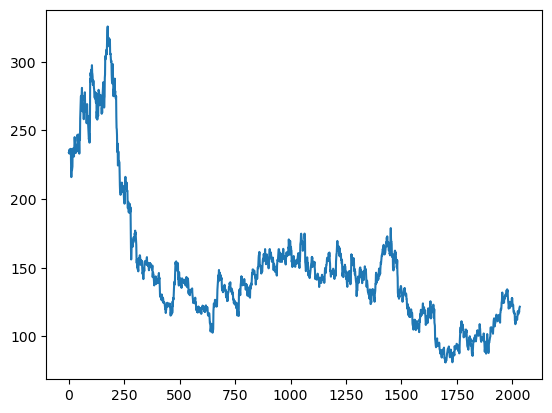

In [9]:
plt.plot(df['Close'])

# DATA PREPROCESSING

In [10]:
dff=df['Close']
dff

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# DATA SPLITTING


In [19]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

In [29]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step) 

In [21]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

# CREATING THE LSTM MODEL

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 9s 180ms/step - loss: 0.0108 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 2s 127ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 2s 119ms/step - loss: 9.4674e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 120ms/step - loss: 8.3519e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 128ms/step - loss: 8.1233e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 138ms/step - loss: 8.0184e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 144ms/step - loss: 7.7182e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 163ms/step - loss: 7.7045e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 185ms/step - loss: 8.1625e-04 - val_loss: 9.9386e-04
Epoch 10/60
19/19 [==============================] - 3s 162ms/step -

In [27]:
test_predict=model.predict(X_test)
     

test_predicted=scaler.inverse_transform(test_predict)
test_predicted

16/16 [==============================] - 3s 36ms/step


array([[0.24883099],
       [0.25034252],
       [0.24898873],
       [0.2422421 ],
       [0.23555948],
       [0.23079777],
       [0.23085633],
       [0.23409398],
       [0.23661926],
       [0.23772338],
       [0.23843491],
       [0.24189505],
       [0.24505484],
       [0.25021067],
       [0.25752163],
       [0.2557861 ],
       [0.25005546],
       [0.2464458 ],
       [0.24517395],
       [0.25558135],
       [0.2694775 ],
       [0.28132516],
       [0.28881234],
       [0.28821367],
       [0.2877103 ],
       [0.28563645],
       [0.28447294],
       [0.28693226],
       [0.28907076],
       [0.29023936],
       [0.29209682],
       [0.2903801 ],
       [0.28242114],
       [0.26586092],
       [0.2506292 ],
       [0.2406019 ],
       [0.23564379],
       [0.23157308],
       [0.22545874],
       [0.21558656],
       [0.20655613],
       [0.20007962],
       [0.19221972],
       [0.1872259 ],
       [0.18024673],
       [0.17149551],
       [0.16647933],
       [0.163

# ACCURACY

In [31]:
import math
from sklearn.metrics import mean_squared_error
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.042424395030729325